In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
# loading a sample dataset
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
#1.3.1 understanding data structure
print(df.head()) # displaying the first five rows of the dataset
print(df.info()) # displaying dataset structure and data types

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [ ]:
# 1.3.2 handling missing data
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# 1.3.3 # calculating summary statistics
print(df.describe()) # generating statistics such as mean,std,min,max,etc

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

<function matplotlib.pyplot.show(close=None, block=None)>

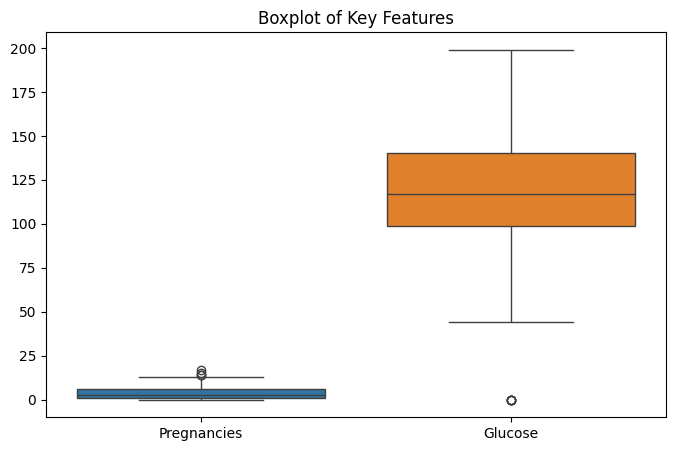

In [ ]:
#  Box plot (using only two key features)
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['Pregnancies','Glucose']])
plt.title("Boxplot of Key Features")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

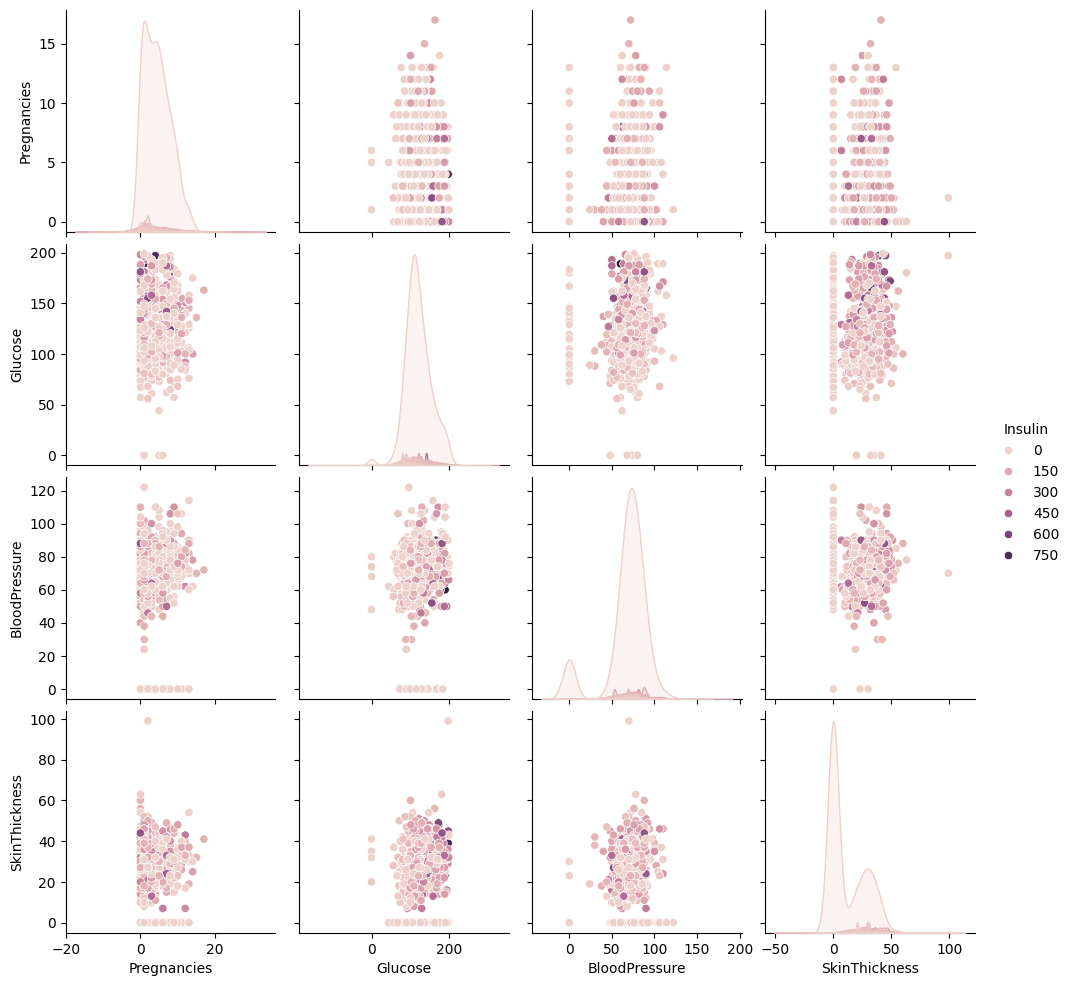

In [ ]:
# Pair plot
sns.pairplot(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin']],hue='Insulin')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

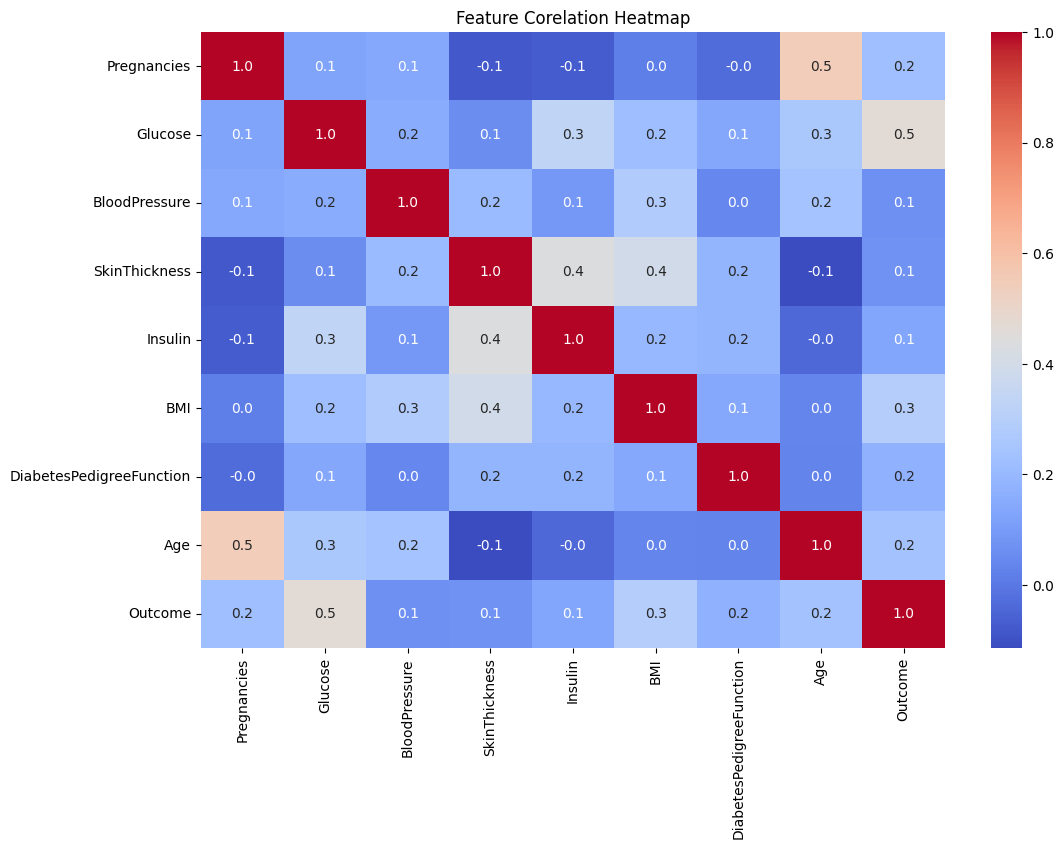

In [ ]:
# Heatmap of feature correlations
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.1f')
plt.title('Feature Corelation Heatmap')
plt.show

In [ ]:
# Data scaling and Normalization
scaler=StandardScaler()

In [ ]:
# Split datasex
x=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
y=['Outcome']
x_train,x_test,y_train,y_test=train_test_split(df[x],df[y],test_size=0.2,random_state=42)

In [ ]:
# Model training
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Model Evaluation
pedections=model.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pedections))
print("Classification Report:\n",classification_report(y_test,pedections))

Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



<function matplotlib.pyplot.show(close=None, block=None)>

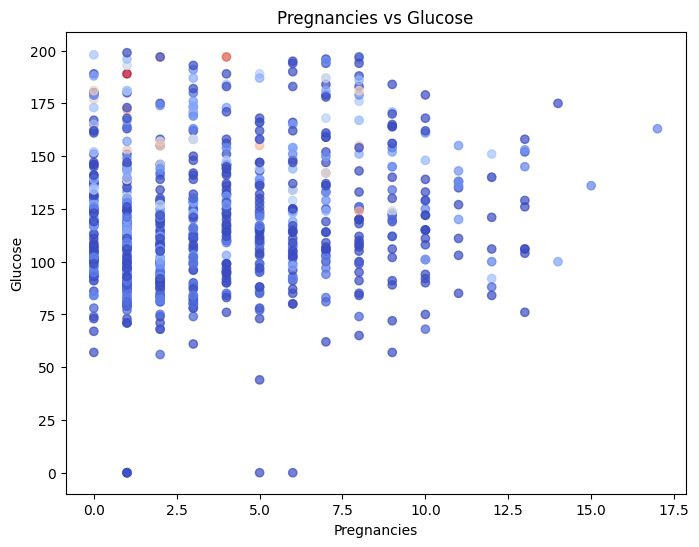

In [ ]:
# Visualization Using Matlib Scatter Plot
plt.figure(figsize=(8,6))
plt.scatter(df['Pregnancies'],df['Glucose'],c=df['Insulin'],cmap='coolwarm',alpha=0.7)
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')
plt.title('Pregnancies vs Glucose')
plt.show

In [ ]:
# User input for prediction
print("Enter feature values for prediction:")
use_input=[]
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'] # Define features
for feature in features: # loop through each feature to get input
    value=float(input(f"{feature}:"))
    use_input.append(value)
scaled_input=scaler.transform([use_input])
result=model.predict(scaled_input) # removed [0] since scaled_input is already 2D
print(f'Predicted: {result[0]}') # print the predicted result (0 or 1 representing the outcome)

Enter feature values for prediction:
Pregnancies:4
